
References: 
1. http://ipywidgets.readthedocs.io/en/latest/examples/Lorenz%20Differential%20Equations.html
2. https://github.com/mspieg/dynamical-systems/blob/master/LorenzEquations.ipynb
3. https://en.wikipedia.org/wiki/List_of_dynamical_systems_and_differential_equations_topics
4. http://ipython-books.github.io/chapter-12-deterministic-dynamical-systems/
http://ipython-books.github.io/
5. http://adventuresinmachinelearning.com/recurrent-neural-networks-lstm-tutorial-tensorflow/
6. http://iamtrask.github.io/2015/11/15/anyone-can-code-lstm/
7. http://colah.github.io/posts/2015-08-Understanding-LSTMs/
8. http://www.iro.umontreal.ca/~lisa/pointeurs/RazvanPascanuThesis.pdf (also in downloads)
9. https://www.gribblelab.org/compneuro/2_Modelling_Dynamical_Systems.html#orgheadline5 
10. https://blog.statsbot.co/time-series-prediction-using-recurrent-neural-networks-lstms-807fa6ca7f
11. https://github.com/yuqirose/trnn poster - http://roseyu.com/Materials/nips17-tsw-poster.pdf
12. https://machinelearningmastery.com/prepare-univariate-time-series-data-long-short-term-memory-networks/

In [41]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [42]:

import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation


In [43]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten, LSTM
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils

## Generate Time Series using the Lorenz System of DE

In [44]:

def solve_lorenz_graph(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')
    SEQUENCE_SIZE = 100         # length of the sequence to generate
    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))

    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])

    # choose a different color for each trajectory
    colors = plt.cm.viridis(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
       # print(x, y, z) #print the data
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

In [45]:
def solve_lorenz(N=10, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):
    
    #define ODE function we need to solve
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose N random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    # First generate a list of time steps starting a zero and going to max_time. 250 steps for each time unit
    t = np.linspace(0, max_time, int(250*max_time))
    # Second integrate the ODE using the lorenz_deriv funtion above for each random starting point
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])

    return t, x_t

In [46]:
sigma=10.0
beta=8./3
rho=28.0
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    """Compute the time-derivative of a Lorenz system."""
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


In [47]:
#print (t)

In [48]:

N=5
max_time = 4.0
#original code generated an array of starting points
x0 = -15 + 30 * np.random.random((N, 3))
print (x0)
# generate one random starting point at a time
point1 = np.random.random(3)
print ("Random point1 = ",point1)

sigma = 10.0
beta = 8.0/3
rho = 28.0

# Solve for the trajectories
# First generate a list of time steps starting a zero and going to max_time. 250 steps for each time unit
t = np.linspace(0, max_time, int(250*max_time))
print ("shape of t = ", t.shape)
#print (" t = " , t)

# Second integrate the ODE using the lorenz_deriv funtion above
#lor1 = integrate.odeint(lorenz_deriv, point1, t, sigma, beta, rho)
lor1 = integrate.odeint(lorenz_deriv, point1, t)
print (" lor1 = ", lor1)
print ("shape of lor1 = ", lor1.shape)

# Do it with a different random starting point-- integrate the ODE using the lorenz_deriv funtion above
point2 = -15 + 30 * np.random.random(3)
lor2 = integrate.odeint(lorenz_deriv, point2, t)

# Do it with a different random starting point-- integrate the ODE using the lorenz_deriv funtion above
point3 = -15 + 30 * np.random.random(3)
lor3 = integrate.odeint(lorenz_deriv, point3, t)

#x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
#                   for x0i in x0])

[[ -5.59976281   6.73180884 -12.74549627]
 [ 14.1172294  -14.38595538  12.87583512]
 [  1.42378422   7.86466315  -5.5272606 ]
 [ -9.32276193 -14.64048957   2.46696539]
 [ 14.91076168 -14.8774079   -3.89373825]]
Random point1 =  [0.62766717 0.41695275 0.41632845]
shape of t =  (1000,)
 lor1 =  [[  0.62766717   0.41695275   0.41632845]
 [  0.62072603   0.48406489   0.41302653]
 [  0.61667327   0.55031236   0.40991408]
 ...
 [ -9.34043876 -10.62634599  26.36086593]
 [ -9.39125279 -10.64304681  26.47760855]
 [ -9.44064581 -10.65557718  26.59578201]]
shape of lor1 =  (1000, 3)


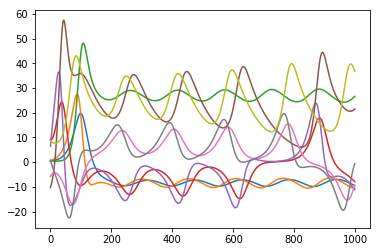

In [49]:
# from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(lor1)
plt.plot(lor2)
plt.plot(lor3)

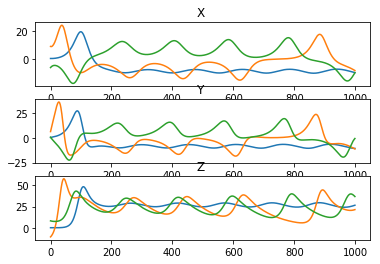

In [50]:

plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(lor1[:,0:1] )
plt.plot(lor2[:,0:1] )
plt.plot(lor3[:,0:1] )
#plt.show()

plt.subplot(3, 1, 2)
plt.title("Y ")
plt.plot(lor1[:,1:2] )
plt.plot(lor2[:,1:2] )
plt.plot(lor3[:,1:2] )
#plt.show()

plt.subplot(3, 1, 3)
plt.title("Z ")
plt.plot(lor1[:,2:3] )
plt.plot(lor2[:,2:3] )
plt.plot(lor3[:,2:3] )
plt.show()

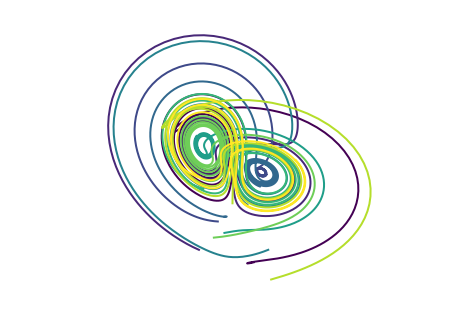

In [51]:
t, x_t = solve_lorenz_graph(angle=0, N=10) #angle initially at 0, butterfly at 134

In [52]:

widget = interactive(solve_lorenz_graph, angle=(0.,360.), max_time=(0.1, 10.0),
                N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(widget)

A Jupyter Widget

In [53]:
#t, x_t = widget.result

In [54]:
t, x_t = solve_lorenz(N=10) #try 10 random starting point initially, chnage to 100 later

In [55]:
print ("lorenz output shape : " , x_t.shape)

lorenz output shape :  (10, 1000, 3)


In [56]:
print ("lorenz output : " , x_t)

lorenz output :  [[[-2.48933986e+00  6.60973480e+00 -1.49965688e+01]
  [-2.14077645e+00  6.18646806e+00 -1.48962127e+01]
  [-1.82130748e+00  5.82299967e+00 -1.47853208e+01]
  ...
  [ 6.87667416e+00  1.07734499e+01  1.78286316e+01]
  [ 7.03431517e+00  1.10115546e+01  1.79410297e+01]
  [ 7.19515729e+00  1.12517722e+01  1.80659207e+01]]

 [[-5.93002282e+00 -1.05973233e+01 -1.22298422e+01]
  [-6.13136261e+00 -1.15193465e+01 -1.18344052e+01]
  [-6.36138540e+00 -1.24619735e+01 -1.14104771e+01]
  ...
  [-1.11085203e+01 -1.62261151e+01  2.32341935e+01]
  [-1.13121656e+01 -1.63640151e+01  2.37150767e+01]
  [-1.15128567e+01 -1.64827701e+01  2.42098140e+01]]

 [[-9.41219366e+00 -4.63317819e+00 -3.09697577e+00]
  [-9.24717733e+00 -5.76936651e+00 -2.87083263e+00]
  [-9.13260659e+00 -6.87477643e+00 -2.60897637e+00]
  ...
  [ 8.94933599e+00  1.00204877e+01  2.61339939e+01]
  [ 8.99188828e+00  1.00458891e+01  2.62149083e+01]
  [ 9.03371359e+00  1.00685518e+01  2.62975123e+01]]

 ...

 [[ 1.40478473e+0

## Convert data into format for Keras

In [57]:
# split into train and test sets
train_size = int(len(x_t)* 0.70)
print(train_size)
test_size = len(x_t) - train_size
lorenz_train = x_t[0:train_size]
lorenz_test  = x_t[train_size:len(x_t)]
print ("train shape : " , lorenz_train.shape)
print ("test shape : " , lorenz_test.shape)

7
train shape :  (7, 1000, 3)
test shape :  (3, 1000, 3)


In [58]:

def to_sequences(seq_size, obs): 
    x = []
    y = []
    for i in range(len(obs)-SEQUENCE_SIZE-1):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [x for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
    return np.array(x),np.array(y)

In [59]:
def to_sequences_ray(seq_size, obs): 
    #x = []
    #y = []
    x, y = to_sequences(SEQUENCE_SIZE,obs[0])
    for i in range(len(obs)):
        xtemp, ytemp = to_sequences(SEQUENCE_SIZE,obs[i])
        x = np.concatenate((x, xtemp), axis=0)
        y = np.concatenate((y, ytemp), axis=0)
        #x.append(xtemp)
        #y.append(ytemp)
    return np.array(x),np.array(y)

In [60]:
data_segment = lorenz_train[1]
print("training data segment shape ", lorenz_train[0].shape)
print("training data segment ", lorenz_train[1])

training data segment shape  (1000, 3)
training data segment  [[ -5.93002282 -10.59732328 -12.22984216]
 [ -6.13136261 -11.51934646 -11.83440517]
 [ -6.3613854  -12.4619735  -11.41047706]
 ...
 [-11.10852032 -16.22611514  23.23419346]
 [-11.31216558 -16.36401507  23.71507674]
 [-11.51285672 -16.48277012  24.20981403]]


In [61]:

#train = np.apply_along_axis(to_sequences_ray, 1, lorenz_train)
print (lorenz_train.shape)
print (len(lorenz_train))

(7, 1000, 3)
7


In [62]:
SEQUENCE_SIZE = 10
x_train,y_train = to_sequences_ray(SEQUENCE_SIZE,lorenz_train)
#print(lorenz_train)
x_test,y_test = to_sequences_ray(SEQUENCE_SIZE,lorenz_test)
print("Shape of training input: ", x_train.shape)
print("Shape of test input: ", x_test.shape)
print ("Shape of training output: " , y_train.shape)
print ("Shape of testing output: " , y_test.shape)

Shape of training input:  (7912, 10, 3)
Shape of test input:  (3956, 10, 3)
Shape of training output:  (7912, 3)
Shape of testing output:  (3956, 3)


In [63]:
print (x_train[1])

[[ -2.14077645   6.18646806 -14.8962127 ]
 [ -1.82130748   5.82299967 -14.78532082]
 [ -1.52754738   5.5141974  -14.66604305]
 [ -1.25643353   5.25549013 -14.5400914 ]
 [ -1.00519263   5.04282303 -14.40882193]
 [ -0.77130991   4.87261417 -14.27330094]
 [ -0.55250119   4.74171357 -14.1343581 ]
 [ -0.3466877    4.64736514 -13.99262854]
 [ -0.15197325   4.58717161 -13.84858652]
 [  0.03337642   4.55906245 -13.70257219]]


In [64]:
print (y_train[1])

[  0.21095219   4.56126473 -13.55481228]


## Build Neural Network model in Keras

In [65]:
print('Build model...')
model = Sequential()
model.add(LSTM(64, input_shape=(None, 3)))
model.add(Dense(32))
model.add(Dense(3))
model.compile(loss='mean_squared_error', optimizer='adam')

#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')

Build model...
Train...


In [66]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=2,epochs=10)

Train on 7912 samples, validate on 3956 samples
Epoch 1/10
 - 7s - loss: 45.0796 - val_loss: 2.2271
Epoch 2/10
 - 6s - loss: 1.3616 - val_loss: 0.6116
Epoch 3/10
 - 5s - loss: 0.2931 - val_loss: 0.2596
Epoch 4/10
 - 4s - loss: 0.0973 - val_loss: 0.1873
Epoch 5/10
 - 4s - loss: 0.0425 - val_loss: 0.1405
Epoch 6/10
 - 4s - loss: 0.0282 - val_loss: 0.1232
Epoch 7/10
 - 4s - loss: 0.0320 - val_loss: 0.1207
Epoch 8/10
 - 4s - loss: 0.0355 - val_loss: 0.1164
Epoch 9/10
 - 4s - loss: 0.0261 - val_loss: 0.1297
Epoch 10/10
 - 4s - loss: 0.0275 - val_loss: 0.1234


## Plot original values and predictions

In [71]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

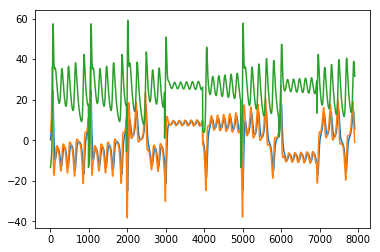

In [72]:
from matplotlib import pyplot as plt
# plot baseline and predictions
#plt.plot(x_train, linestyle=':')

plt.plot(trainPredict)
#list = np.arange(len(trainPredict)+10,len(trainPredict)+len(testPredict)+10)
#plt.plot(list,testPredict)

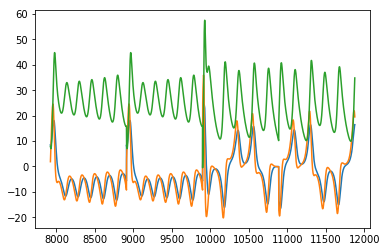

In [73]:
list = np.arange(len(trainPredict)+10,len(trainPredict)+len(testPredict)+10)
plt.plot(list,testPredict) # plot baseline and predictions

In [74]:
print(trainPredict-y_train)

[[ 0.27170489 -0.37438437  0.35182222]
 [ 0.20101396 -0.287626    0.25165734]
 [ 0.15138131 -0.20451575  0.16304   ]
 ...
 [ 0.05468684 -0.03059059  0.24245128]
 [ 0.04510458 -0.04729482  0.23670777]
 [ 0.03458098 -0.04620561  0.23319629]]


## Calculate difference between prediction and actual

Graphing true test output against predicted output 


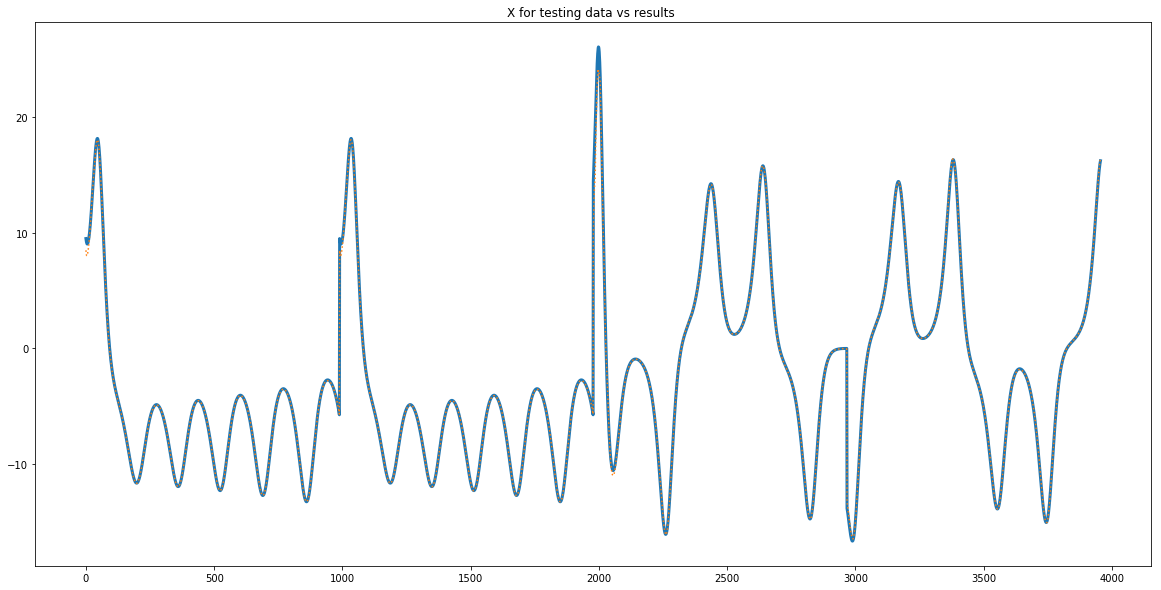

In [75]:
print("Graphing true test output against predicted output ")
plt.figure(figsize=(20,10))
plt.title("X for testing data vs results ")
plt.plot(y_test[:,0:1], linewidth=3.0 )
plt.plot(testPredict[:,0:1], linestyle=':' )
plt.show()

Graphing true test output against predicted output 


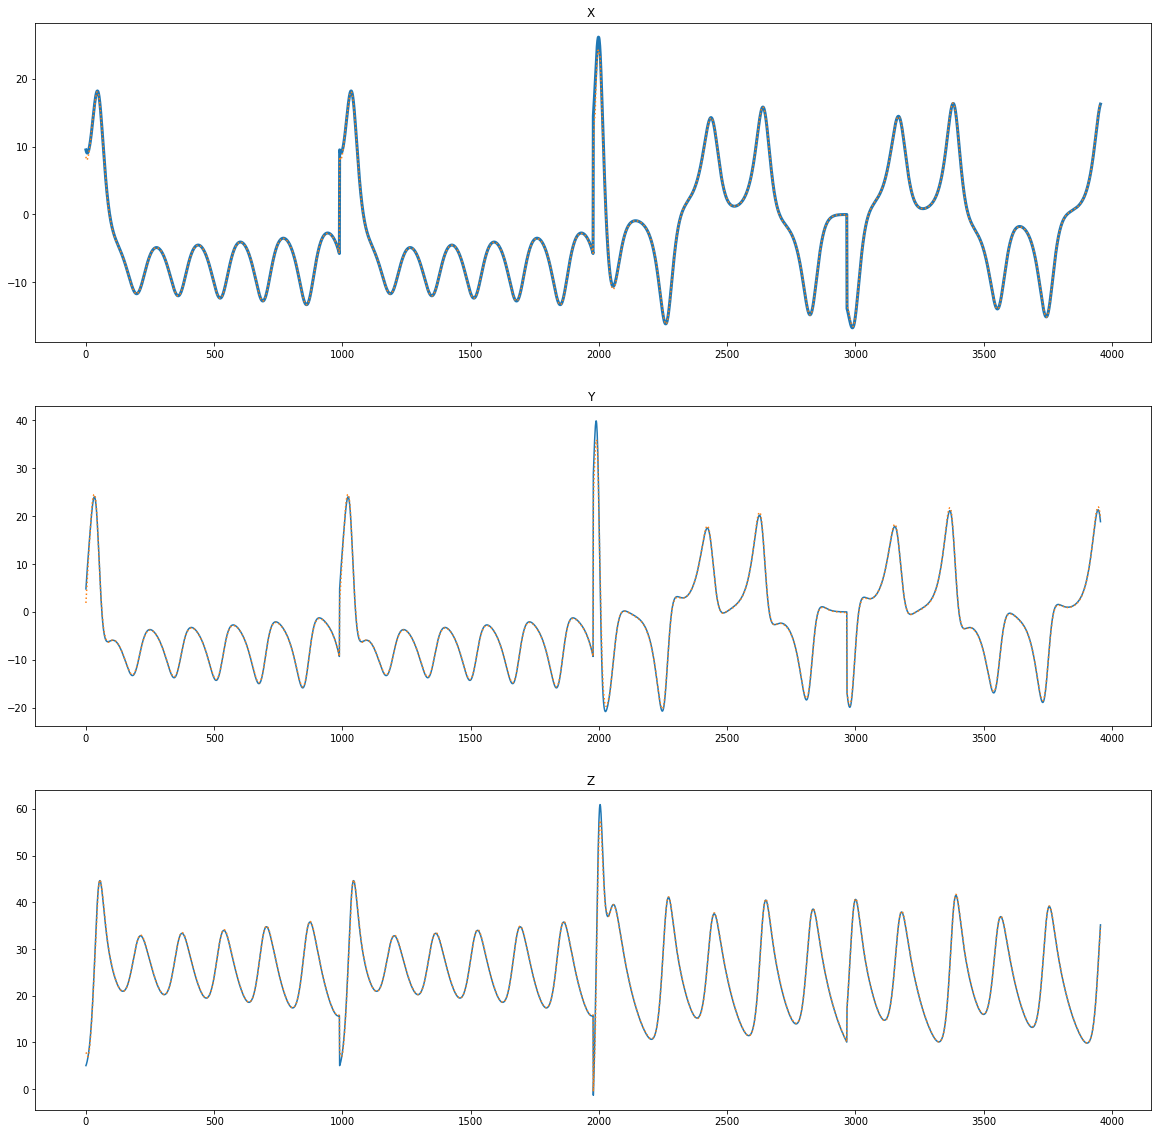

In [76]:
print("Graphing true test output against predicted output ")
plt.figure(figsize=(20,20))
plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(y_test[:,0:1], linewidth=3.0 )
plt.plot(testPredict[:,0:1], linestyle=':' )

plt.subplot(3, 1, 2)
plt.title("Y ")
plt.plot(y_test[:,1:2] )
plt.plot(testPredict[:,1:2], linestyle=':' )

plt.subplot(3, 1, 3)
plt.title("Z ")
plt.plot(y_test[:,2:3] )
plt.plot(testPredict[:,2:3], linestyle=':' )
plt.show()

In [77]:
print (y_test.shape)
print (y_test)

(3956, 3)
[[ 9.50743691  4.78218811  5.05422845]
 [ 9.33868889  5.62420225  5.19580543]
 [ 9.20915422  6.44350491  5.36346359]
 ...
 [15.98936717 19.81395459 33.41044267]
 [16.1306741  19.35847338 34.30881879]
 [16.2473985  18.84463462 35.17646154]]


In [78]:
y_test_win = [[x] for x in y_test]
y_test_win = np.array(y_test_win)
print (y_test_win.shape)
print (y_test_win)

(3956, 1, 3)
[[[ 9.50743691  4.78218811  5.05422845]]

 [[ 9.33868889  5.62420225  5.19580543]]

 [[ 9.20915422  6.44350491  5.36346359]]

 ...

 [[15.98936717 19.81395459 33.41044267]]

 [[16.1306741  19.35847338 34.30881879]]

 [[16.2473985  18.84463462 35.17646154]]]


In [79]:
print (testPredict.shape)
print (testPredict)

(3956, 3)
[[ 8.485632   1.8551497  7.867585 ]
 [ 8.251162   2.8198864  7.794326 ]
 [ 8.09635    3.8603067  7.6099596]
 ...
 [16.176075  20.48681   32.932003 ]
 [16.314743  20.018116  33.87536  ]
 [16.416256  19.477028  34.805046 ]]


In [80]:
test_diff = testPredict-y_test_win
print(testPredict-y_test_win)

[[[ -1.02180496  -2.92703836   2.81335673]
  [ -1.25627533  -1.96230166   2.74009737]
  [ -1.41108719  -0.92188137   2.55573115]
  ...
  [  6.66863807  15.70462257  27.87777457]
  [  6.80730614  15.23592789  28.82113013]
  [  6.90881904  14.69483978  29.75081763]]

 [[ -0.85305695  -3.7690525    2.67177976]
  [ -1.08752732  -2.8043158    2.5985204 ]
  [ -1.24233918  -1.76389551   2.41415418]
  ...
  [  6.83738609  14.86260844  27.73619759]
  [  6.97605415  14.39391375  28.67955316]
  [  7.07756706  13.85282565  29.60924066]]

 [[ -0.72352228  -4.58835516   2.50412159]
  [ -0.95799264  -3.62361846   2.43086224]
  [ -1.1128045   -2.58319817   2.24649601]
  ...
  [  6.96692076  14.04330578  27.56853943]
  [  7.10558882  13.57461109  28.51189499]
  [  7.20710173  13.03352298  29.44158249]]

 ...

 [[ -7.50373522 -17.95880484 -25.54285749]
  [ -7.73820559 -16.99406814 -25.61611684]
  [ -7.89301745 -15.95364785 -25.80048307]
  ...
  [  0.18670782   0.6728561   -0.47843965]
  [  0.32537588   

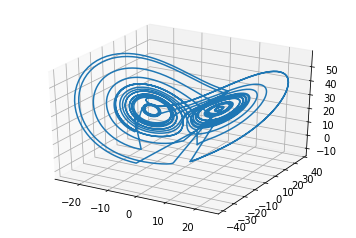

In [81]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(y_train[:,0],y_train[:,1],y_train[:,2])
plt.show()

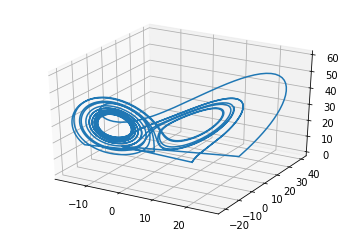

In [82]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(y_test[:,0],y_test[:,1],y_test[:,2])
plt.show()

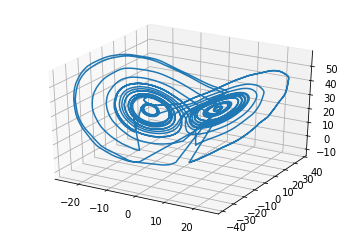

In [83]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(trainPredict[:,0],trainPredict[:,1],trainPredict[:,2])
plt.show()

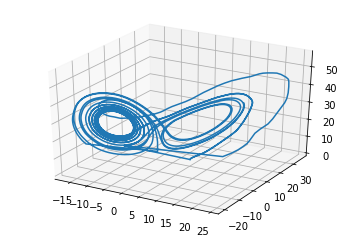

In [84]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(testPredict[:,0],testPredict[:,1],testPredict[:,2])
plt.show()

## Testing with single starting point - predicting 1 ahead

In [85]:
SEQUENCE_SIZE = 10
single_t, single_lor = solve_lorenz(N=1) #try 10 random starting point initially, chnage to 100 later
single_x, single_y  = to_sequences_ray(SEQUENCE_SIZE,single_lor)
singlePredict = model.predict(single_x)
print ("Shape of data: ", single_lor.shape)
print ("Shape of windowed data: ", single_x.shape)

Shape of data:  (1, 1000, 3)
Shape of windowed data:  (1978, 10, 3)


Graphing true test output against predicted output 


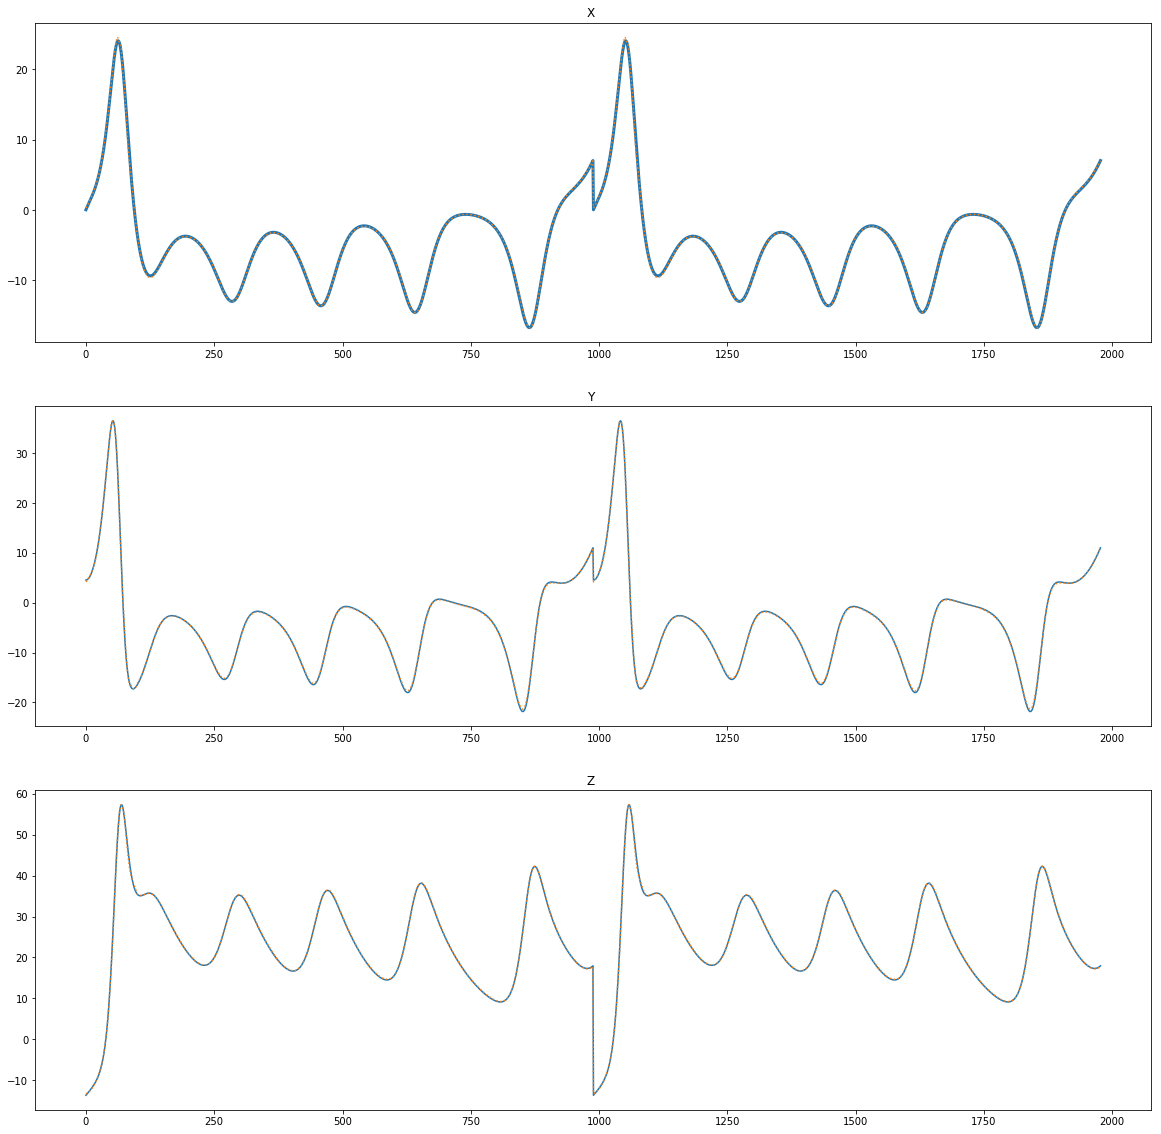

In [86]:
print("Graphing true test output against predicted output ")
plt.figure(figsize=(20,20))
plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(single_y[:,0:1], linewidth=3.0 )
plt.plot(singlePredict[:,0:1], linestyle=':' )

plt.subplot(3, 1, 2)
plt.title("Y ")
plt.plot(single_y[:,1:2] )
plt.plot(singlePredict[:,1:2], linestyle=':' )

plt.subplot(3, 1, 3)
plt.title("Z ")
plt.plot(single_y[:,2:3] )
plt.plot(singlePredict[:,2:3], linestyle=':' )
plt.show()

In [87]:
print ("Calculating error with single time series")
print("Shape of output: ",single_y.shape)
err3D = single_y - singlePredict
err1D = (single_y - singlePredict)**2
err1D = err1D.sum(axis=-1)
err1D = np.sqrt(err1D)
aveErr = np.average(err1D)
print("Average error = ", aveErr)

Calculating error with single time series
Shape of output:  (1978, 3)
Average error =  0.22157809555301758


Graphing true test output against predicted output 


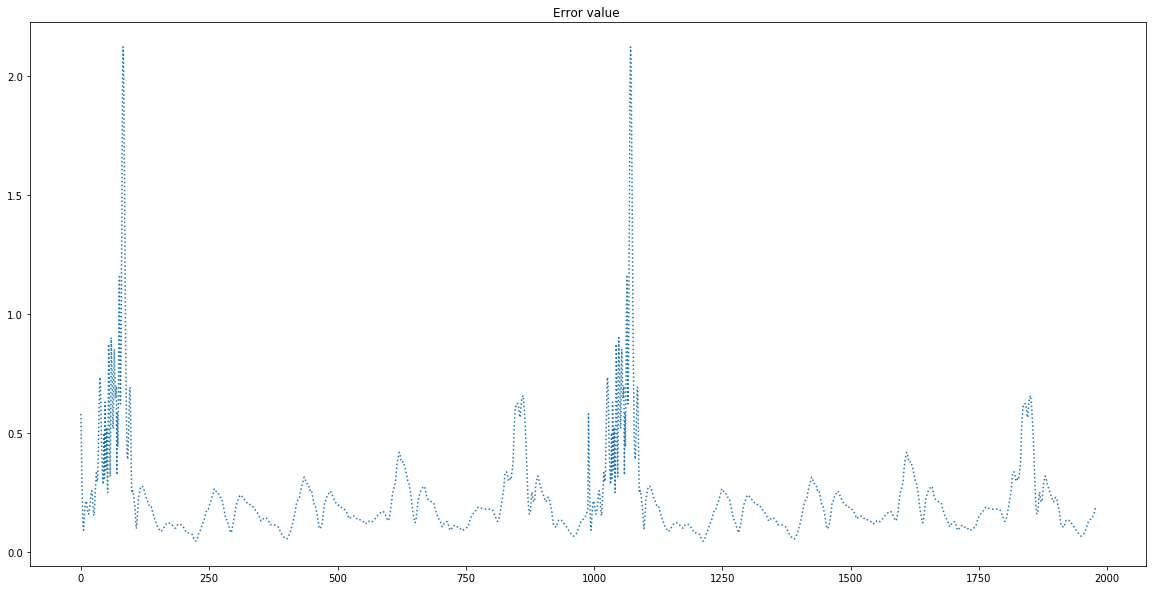

In [88]:
print("Graphing true test output against predicted output ")
plt.figure(figsize=(20,10))
plt.title("Error value ")
plt.plot(err1D, linestyle=':' )
plt.show()